In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
#C_60

# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_130221.txt' #QD_16
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_131312.txt' #QD_17 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_132234.txt' #QD_17 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_133514.txt' #QD_18
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_135834.txt' #QD_20
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_141643.txt' #QD_21
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164047.txt' #QD_23 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164648.txt' #QD_23 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172516.txt' #QD_24 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172834.txt' #QD_24 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_143908.txt' #QD_27
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_145037.txt' #QD_28
file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_154014.txt' #QD_29

# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-17_132552.txt' #QD_40
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-03-10_160635.txt' #QD_49

In [26]:
# CQDs
file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-19_144221.txt' #QD_55

In [27]:
data = pd.read_csv(file_name, sep="\t")  # Read the file with tab as the delimiter

# Extract the columns
x = data["Time (ps)"] / 1000 # Time in ns
y = data["Counts per bin"]

In [28]:
def plot_lineal(x, y, fit_ini, width, height, font_size):

    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Linear Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_logarithmic(x, y, fit_ini, width, height, font_size):
    
    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Logarithmic Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (log scale)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True, which="both")  # Enable grid for both major and minor ticks
    plt.legend(fontsize=font_size)
    
    plt.show()


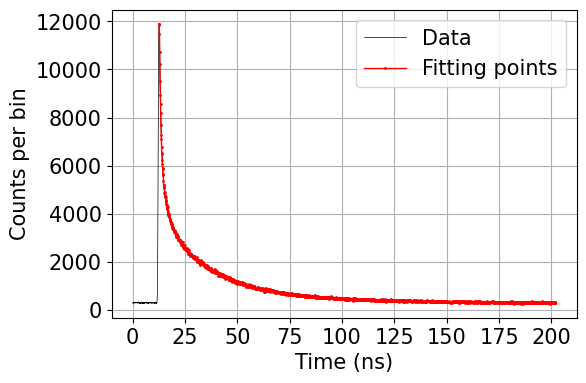

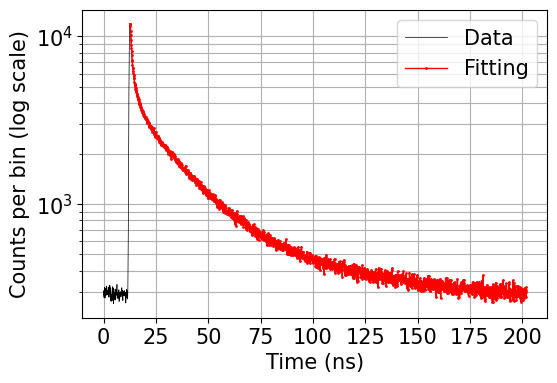

In [37]:
width = 6
height = 4
font_size = 15

i_ini = 580 # Inital index of the plot
i_end = 2600 # Final index of the plot
fit_ini = 125 # Initial index for the fit

plot_lineal(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)
plot_logarithmic(x[i_ini:i_end], y[i_ini:i_end], fit_ini, width, height, font_size)

In [38]:
def exp_func_3(x, A, B_1, x_0_1, tau_1, B_2, x_0_2, tau_2, B_3, x_0_3, tau_3):
    return A + B_1 * np.exp(-(x - x_0_1) / tau_1) + B_2 * np.exp(-(x - x_0_2) / tau_2) + B_3 * np.exp(-(x - x_0_3) / tau_3)

def fit_exponential_3(x, y):
    
    initial_guess = [np.min(y), np.max(y)-np.min(y), np.min(x), 6.0, np.max(y)-np.min(y), np.min(x), 0.4, np.max(y)-np.min(y), np.min(x), 0.04]
    params, pcov = curve_fit(exp_func_3, x, y, p0=initial_guess)
    return params, pcov

def plot_fit_lineal_3(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_3(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y / 1000, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit / 1000, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (×10³)', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic_3(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_3(x_fit, *params)
    
    errors = np.sqrt(y)
    
    plt.figure(figsize=(width, height))
    
    plt.fill_between(x - min(x), y - errors, y + errors, color='#A0A0A0', alpha=1.0)
    plt.plot(x_fit - min(x), y_fit, marker='o', color='red', markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True)
    #plt.legend(fontsize=font_size)
    
    plt.show()

A: 334.759 ± inf counts

B_1: 4262.990 ± inf counts
t_0_1: 68.150 ± inf ns
tau_1: 24.164 ± inf ns

B_2: 9024.755 ± inf counts
t_0_2: 70.394 ± inf ns
tau_2: 1.334 ± inf ns

B_3: 7566.793 ± inf counts
t_0_3: 70.482 ± inf ns
tau_3: 0.000 ± inf ns

tau_averaged: 5.517 ± inf ns


C:\Users\HP\AppData\Local\Temp\ipykernel_23776\3994306049.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, pcov = curve_fit(exp_func_3, x, y, p0=initial_guess)


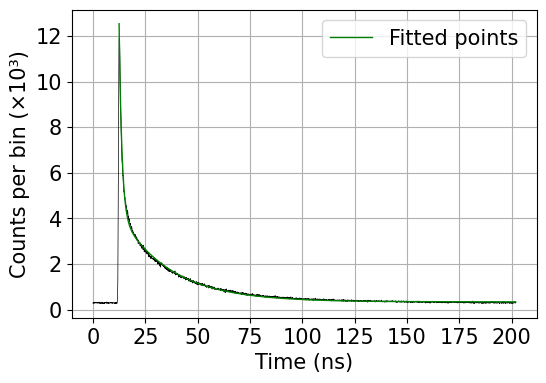

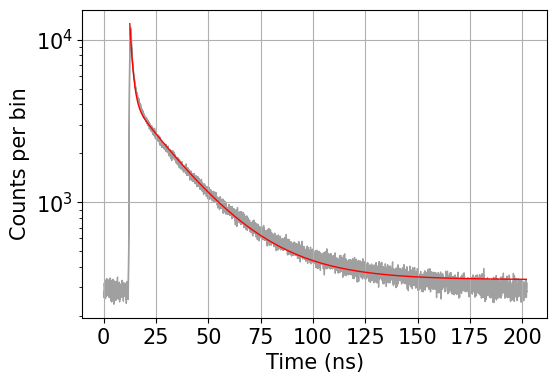

In [39]:
params, pcov = fit_exponential_3(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts\n")
print(f"B_1: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_1: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_1: {params[3]:.3f} ± {perr[3]:.3f} ns\n")
print(f"B_2: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0_2: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_2: {params[6]:.3f} ± {perr[6]:.3f} ns\n")
print(f"B_3: {params[7]:.3f} ± {perr[7]:.3f} counts")
print(f"t_0_3: {params[8]:.3f} ± {perr[8]:.3f} ns")
print(f"tau_3: {params[9]:.3f} ± {perr[9]:.3f} ns\n")

tau_averaged = (params[1]*params[3] + params[4]*params[6] + params[7]*params[9])/(params[1] + params[4] + params[7])
err_tau_averaged = np.sqrt(params[1]**2*perr[3]**2 + params[4]**2*perr[6]**2 + params[7]**2*perr[9]**2)/(params[1] + params[4] + params[7])

print(f"tau_averaged: {tau_averaged:.3f} ± {err_tau_averaged:.3f} ns")

plot_fit_lineal_3(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic_3(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)

In [40]:
def exp_func_2(x, A, B_1, x_0_1, tau_1, B_2, x_0_2, tau_2):
    return A + B_1 * np.exp(-(x - x_0_1) / tau_1) + B_2 * np.exp(-(x - x_0_2) / tau_2) 

def fit_exponential_2(x, y):
    
    params, pcov = curve_fit(exp_func_2, x, y, p0=[np.min(y), np.max(y)-np.min(y), np.min(x), 6.0, np.max(y)-np.min(y), np.min(x), 0.4])
    return params, pcov

def plot_fit_lineal_2(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_2(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y / 1000, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit / 1000, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (×10³)', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic_2(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_2(x_fit, *params)
    
    errors = np.sqrt(y)
    
    plt.figure(figsize=(width, height))
    
    plt.fill_between(x - min(x), y - errors, y + errors, color="#0004FF", alpha=0.2)
    plt.plot(x_fit - min(x), y_fit, marker='o', color="#0004FF", markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts (a.u.)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.yticks([])
    plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.3) 
    #plt.legend(fontsize=font_size)
    
    plt.show()

A: 334.758 ± 1.979 counts

B_1: 12200.168 ± 2048959650.872 counts
t_0_1: 42.742 ± 4055091.289 ns
tau_1: 24.164 ± 0.103 ns

B_2: 255668.758 ± 57538415995.700 counts
t_0_2: 65.933 ± 300117.043 ns
tau_2: 1.334 ± 0.009 ns


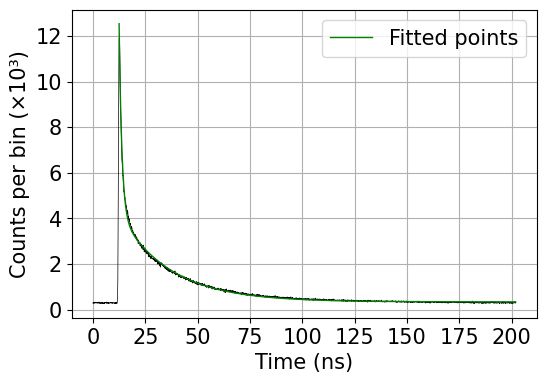

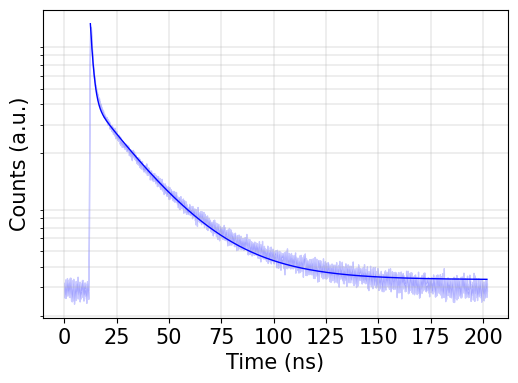

In [41]:
params, pcov = fit_exponential_2(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts\n")
print(f"B_1: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_1: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_1: {params[3]:.3f} ± {perr[3]:.3f} ns\n")
print(f"B_2: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0_2: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_2: {params[6]:.3f} ± {perr[6]:.3f} ns")

plot_fit_lineal_2(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic_2(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)